import utils.image_analysis_utils as iau
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Set up matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
# Simple Image Analysis with CV2

This notebook demonstrates:
1. **Pick a frame** from NPZ files and save it locally
2. **Use standard cv2 functions** directly for image processing
3. **Experiment** with different OpenCV operations

## Step 1: Pick and Save a Frame

First, let's see what NPZ files are available and pick a frame to work with:

=== Loading Sample Image ===


/Users/eirikvarnes/code/SOLAQUA/utils/image_analysis_utils.py:429: RuntimeWarning: invalid value encountered in cast
  frame_uint8 = (np.clip(frame, 0, 1) * 255).astype(np.uint8)


Source: npz
NPZ file: 2024-08-22_14-06-43_data_cones.npz
Frame: 296/591
Timestamp: 12:07:23
Value range: [nan, nan]


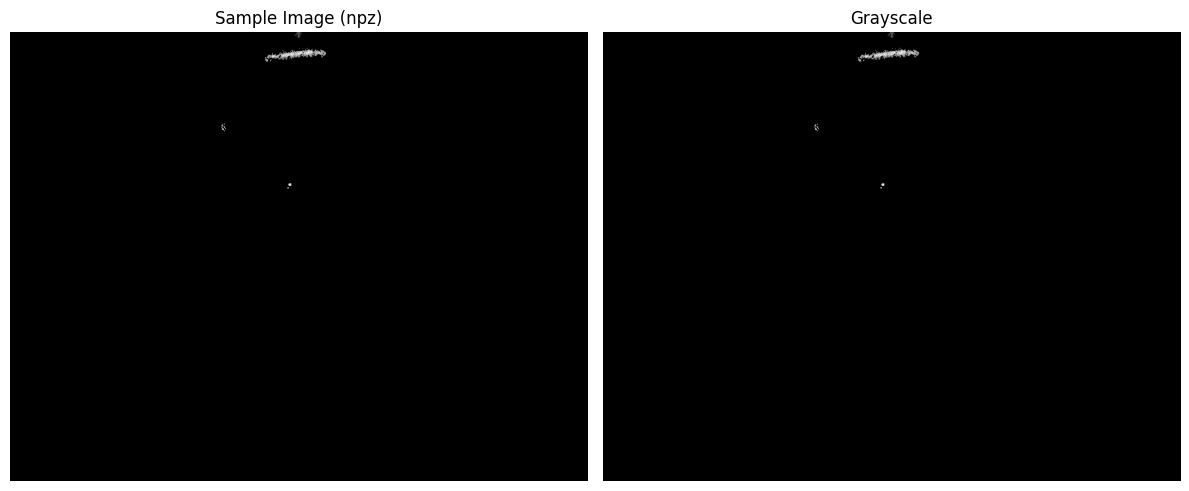

Image shape: (700, 900, 3)
Ready for processing!


In [ ]:
# List available NPZ files
iau.list_npz_files()

# Pick and save a frame
frame_info = iau.pick_and_save_frame(
    npz_file_index=0,           # Choose which NPZ file (0, 1, 2, ...)
    frame_position='middle',    # 'start', 'middle', 'end', or 0.0-1.0
    output_path='current_frame.png'  # Where to save it
)

print("\nFrame saved! Now we can work with it using standard cv2 functions.")

## Switch Between Different Frames

Easy utility functions to load different frames and NPZ files:

=== Available NPZ Files in exports/outputs ===
0. 2024-08-22_14-06-43_data_cones.npz
   Frames: 592 (700x900 pixels)
   Duration: 12:07:23 to 12:07:23
   Value range: [nan, nan]
   Active frames: 0/592 (0.0%)

0. 2024-08-22_14-06-43_data_cones.npz
   Frames: 592 (700x900 pixels)
   Duration: 12:07:23 to 12:07:23
   Value range: [nan, nan]
   Active frames: 0/592 (0.0%)

1. 2024-08-20_13-40-35_data_cones.npz
   Frames: 739 (700x900 pixels)
   Duration: 11:41:25 to 11:41:25
1. 2024-08-20_13-40-35_data_cones.npz
   Frames: 739 (700x900 pixels)
   Duration: 11:41:25 to 11:41:25
   Value range: [nan, nan]
   Active frames: 0/739 (0.0%)

   Value range: [nan, nan]
   Active frames: 0/739 (0.0%)

2. 2024-08-22_14-47-39_data_cones.npz
   Frames: 726 (700x900 pixels)
   Duration: 12:48:28 to 12:48:28
   Value range: [nan, nan]
2. 2024-08-22_14-47-39_data_cones.npz
   Frames: 726 (700x900 pixels)
   Duration: 12:48:28 to 12:48:28
   Value range: [nan, nan]
   Active frames: 0/726 (0.0%)

   Acti

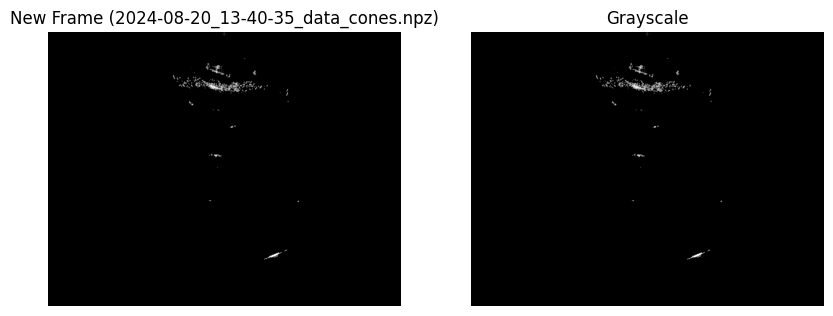

In [10]:
# Show available NPZ files
iau.print_npz_info()

# Easy functions to switch frames:
print("=== Easy Frame Switching ===")
print("To switch to a different frame, use:")
print("sample_image, metadata = iau.load_sample_image(npz_file_index=1, frame_position='start')")
print("gray_image = iau.to_grayscale(sample_image)")
print()
print("Frame position options:")
print("  'start'   - First frame")
print("  'middle'  - Middle frame (default)")
print("  'end'     - Last frame")
print("  0.25      - 25% through the sequence")
print("  0.75      - 75% through the sequence")
print()
print("Available NPZ files: 0-" + str(len(iau.get_available_npz_files())-1) if iau.get_available_npz_files() else "None")

# Example: Load a different frame (uncomment to use)
sample_image, metadata = iau.load_sample_image(npz_file_index=1, frame_position=0.8)
gray_image = iau.to_grayscale(sample_image)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title(f"New Frame ({metadata['npz_file']})")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')
plt.show()

=== Quick Frame Switch Example ===


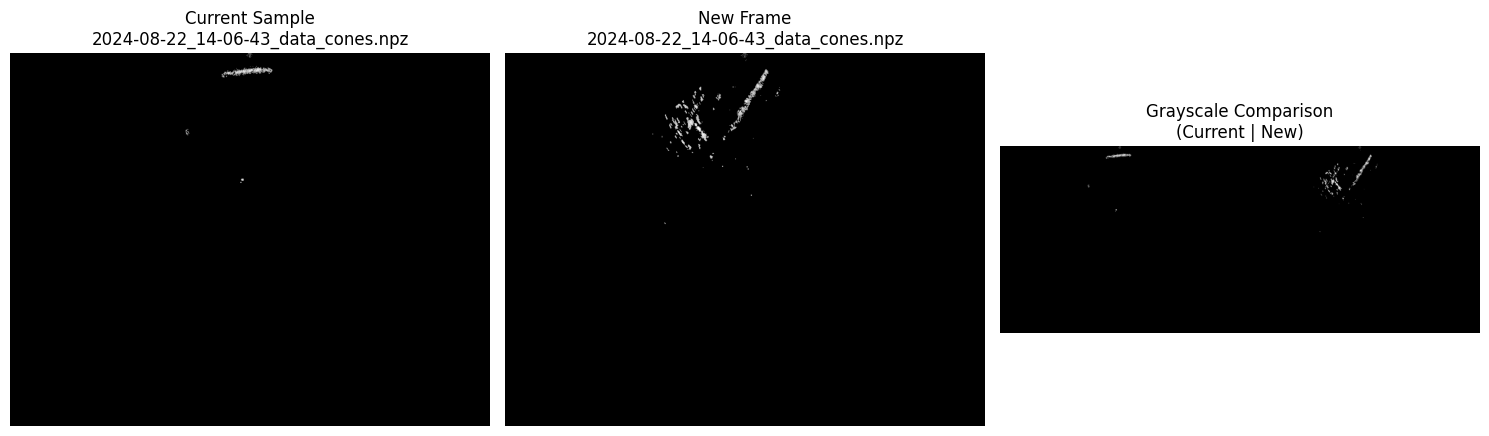

Current: 296/592 frames
New:     591/592 frames


In [4]:
# Quick frame switching example
print("=== Quick Frame Switch Example ===")

# Load a different frame from a different NPZ file
try:
    new_image, new_metadata = iau.load_sample_image(
        npz_file_index=0,        # Try different indices if you have multiple NPZ files
        frame_position='end'     # Try 'start', 'middle', 'end', or 0.75
    )
    
    plt.figure(figsize=(15, 5))
    
    # Original sample
    plt.subplot(1, 3, 1)
    plt.imshow(sample_image)
    plt.title(f"Current Sample\n{metadata.get('npz_file', 'synthetic')}")
    plt.axis('off')
    
    # New sample
    plt.subplot(1, 3, 2)
    plt.imshow(new_image)
    plt.title(f"New Frame\n{new_metadata.get('npz_file', 'synthetic')}")
    plt.axis('off')
    
    # Side by side grayscale comparison
    plt.subplot(1, 3, 3)
    current_gray = iau.to_grayscale(sample_image)
    new_gray = iau.to_grayscale(new_image)
    
    # Create a side-by-side comparison
    comparison = np.hstack([current_gray, new_gray])
    plt.imshow(comparison, cmap='gray')
    plt.title('Grayscale Comparison\n(Current | New)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Current: {metadata.get('frame_index', 'N/A')}/{metadata.get('total_frames', 'N/A')} frames")
    print(f"New:     {new_metadata.get('frame_index', 'N/A')}/{new_metadata.get('total_frames', 'N/A')} frames")
    
except Exception as e:
    print(f"Could not load comparison frame: {e}")
    print("Only one frame/file available or error occurred")

## Method 1: Individual Function Approach

Use individual functions step by step:

=== Approach 1: Grayscale -> Canny -> Find Lines ===


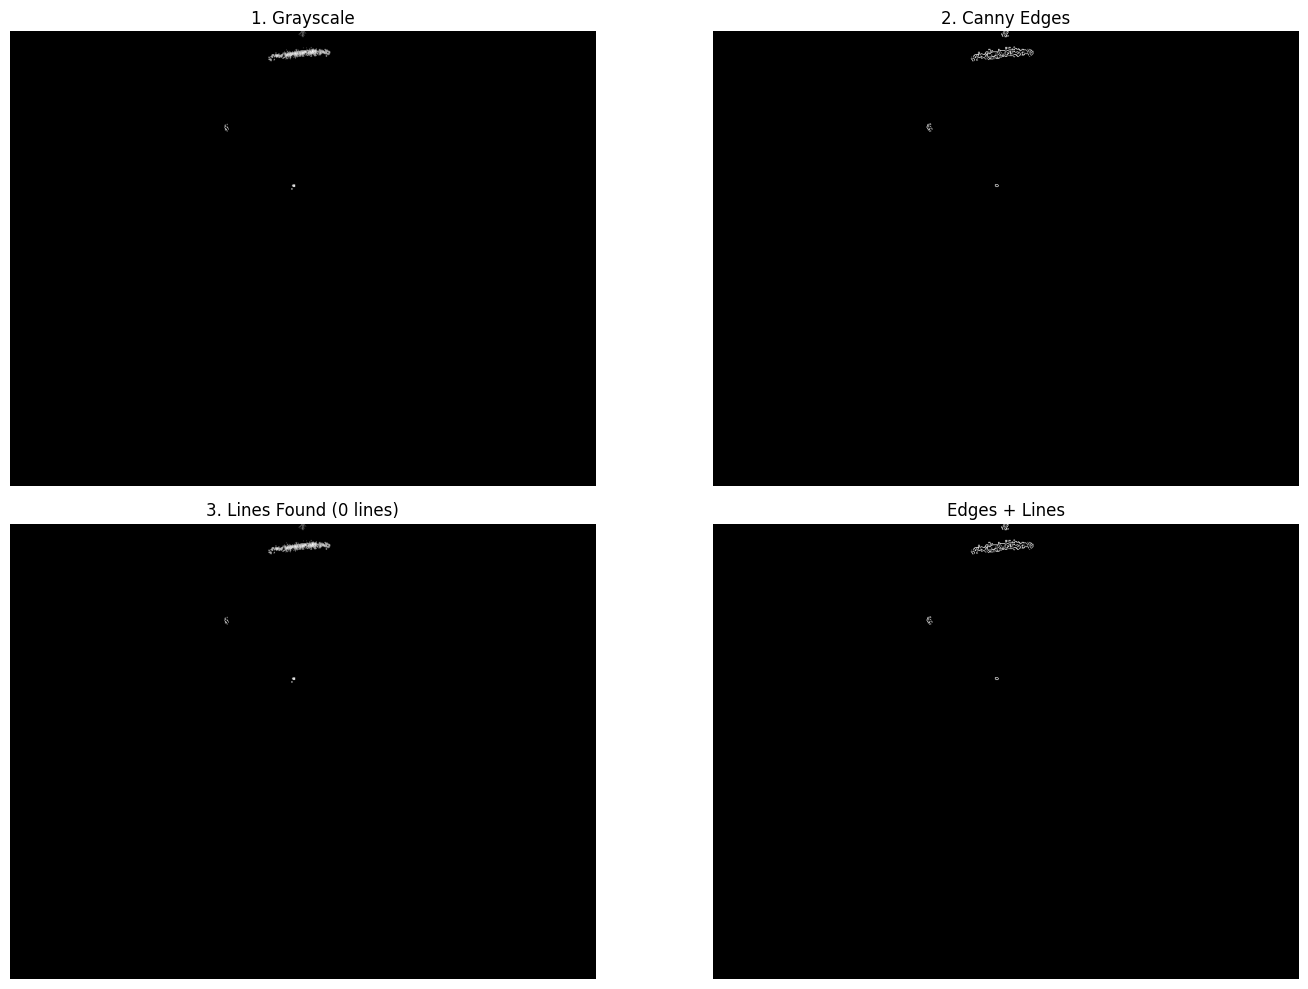

Found 0 lines


In [5]:
# Approach 1: Grayscale -> Canny -> Find Lines
print("=== Approach 1: Grayscale -> Canny -> Find Lines ===")

# Step 1: Convert to grayscale (already done above)
step1 = gray_image.copy()

# Step 2: Apply Canny edge detection
step2 = iau.canny_edge_detection(step1, low_threshold=50, high_threshold=150)

# Step 3: Find lines using Hough transform
lines1 = iau.find_lines_hough(step2, threshold=100, min_line_length=50, max_line_gap=10)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].imshow(step1, cmap='gray')
axes[0,0].set_title('1. Grayscale')
axes[0,0].axis('off')

axes[0,1].imshow(step2, cmap='gray')
axes[0,1].set_title('2. Canny Edges')
axes[0,1].axis('off')

# Draw lines on original image
result1 = iau.draw_lines_on_image(sample_image, lines1, color=(0, 255, 0), thickness=2)
axes[1,0].imshow(result1)
axes[1,0].set_title(f'3. Lines Found ({len(lines1)} lines)')
axes[1,0].axis('off')

# Show edge image with lines
edges_with_lines = cv2.cvtColor(step2, cv2.COLOR_GRAY2RGB)
if len(lines1) > 0:
    edges_with_lines = iau.draw_lines_on_image(edges_with_lines, lines1, color=(255, 0, 0), thickness=1)
axes[1,1].imshow(edges_with_lines)
axes[1,1].set_title('Edges + Lines')
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

print(f"Found {len(lines1)} lines")

=== Approach 2: Grayscale -> Blur -> Canny -> Find Lines ===


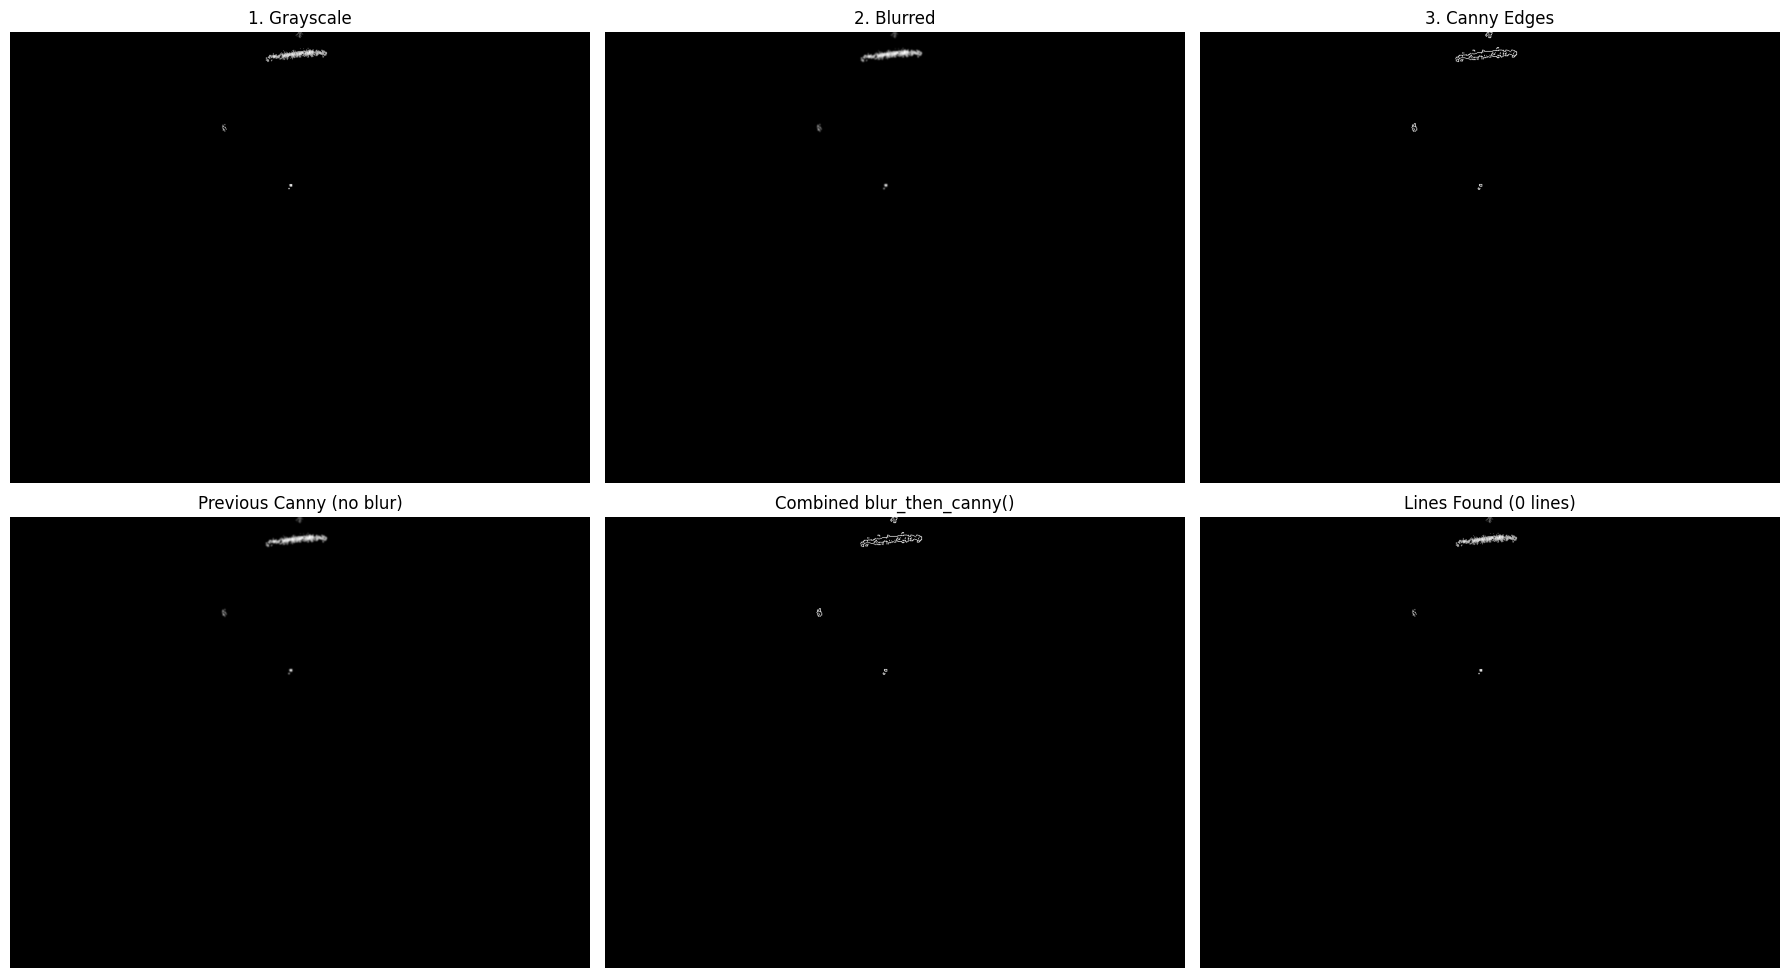

Approach 1 found 0 lines
Approach 2 found 0 lines


In [6]:
# Approach 2: Grayscale -> Blur -> Canny -> Find Lines
print("=== Approach 2: Grayscale -> Blur -> Canny -> Find Lines ===")

# Step 1: Convert to grayscale (already done)
step1 = gray_image.copy()

# Step 2: Apply Gaussian blur
step2 = iau.blur_image(step1, blur_type='gaussian', ksize=5, sigma=1.0)

# Step 3: Apply Canny edge detection
step3 = iau.canny_edge_detection(step2, low_threshold=50, high_threshold=150)

# Step 4: Find lines
lines2 = iau.find_lines_hough(step3, threshold=80, min_line_length=40, max_line_gap=15)

# Or use the combined blur_then_canny function
step3_combined = iau.blur_then_canny(gray_image, blur_type='gaussian', ksize=5, sigma=1.0,
                                   low_threshold=50, high_threshold=150)

# Visualize results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0,0].imshow(step1, cmap='gray')
axes[0,0].set_title('1. Grayscale')
axes[0,0].axis('off')

axes[0,1].imshow(step2, cmap='gray')
axes[0,1].set_title('2. Blurred')
axes[0,1].axis('off')

axes[0,2].imshow(step3, cmap='gray')
axes[0,2].set_title('3. Canny Edges')
axes[0,2].axis('off')

# Compare with previous approach
axes[1,0].imshow(step2, cmap='gray')  # Previous Canny
axes[1,0].set_title('Previous Canny (no blur)')
axes[1,0].axis('off')

axes[1,1].imshow(step3_combined, cmap='gray')
axes[1,1].set_title('Combined blur_then_canny()')
axes[1,1].axis('off')

# Draw lines on original
result2 = iau.draw_lines_on_image(sample_image, lines2, color=(255, 0, 0), thickness=2)
axes[1,2].imshow(result2)
axes[1,2].set_title(f'Lines Found ({len(lines2)} lines)')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print(f"Approach 1 found {len(lines1)} lines")
print(f"Approach 2 found {len(lines2)} lines")

## Method 2: Pipeline Class Approach

Use the ImageProcessor class for flexible chaining:

=== Method 2A: Pipeline Class - Method Chaining ===
Pipeline 1 history: original -> grayscale -> canny(50,150) -> find_lines_probabilistic(100)
Lines found: 0
Pipeline 2 history: original -> grayscale -> blur_gaussian(7,1.5) -> canny(40,120) -> find_lines_probabilistic(80)
Lines found: 0


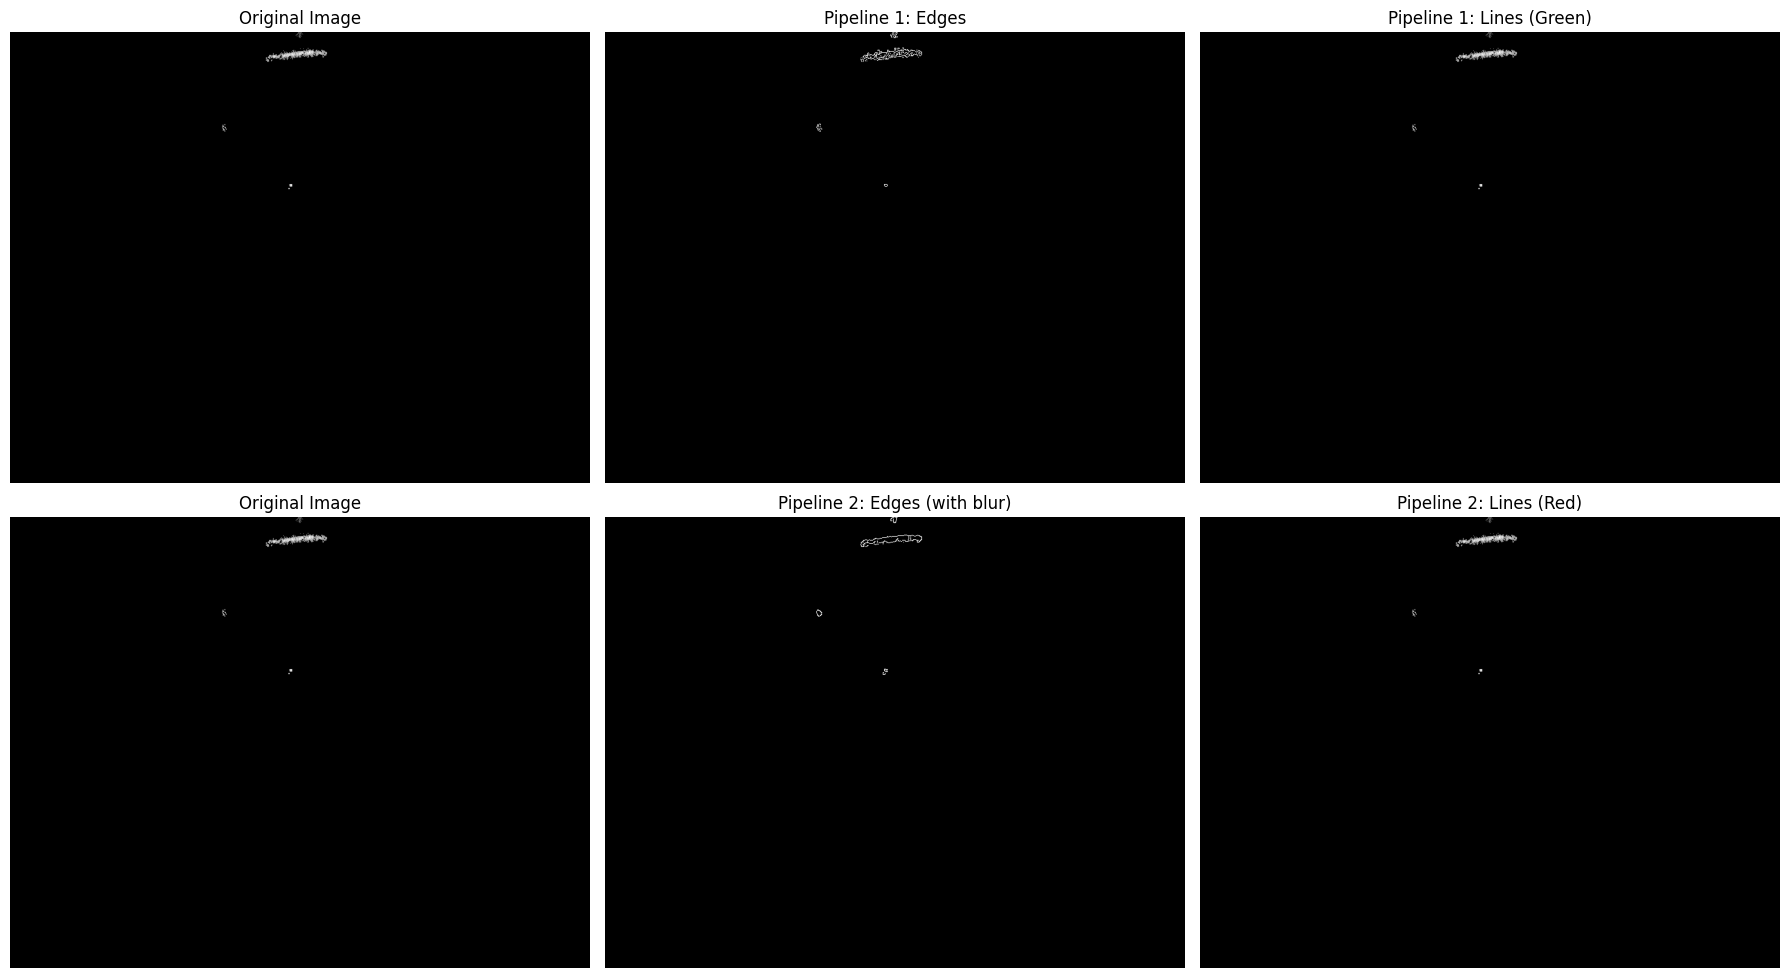

In [7]:
# Method 2A: Pipeline with method chaining
print("=== Method 2A: Pipeline Class - Method Chaining ===")

# Create processor and chain operations
processor = iau.ImageProcessor(sample_image)

# Pipeline 1: grayscale -> canny -> find lines
result_pipeline1 = (processor
                   .reset()
                   .grayscale()
                   .canny(low_threshold=50, high_threshold=150)
                   .find_lines(threshold=100, min_line_length=50, max_line_gap=10))

print(f"Pipeline 1 history: {processor.get_history()}")
print(f"Lines found: {len(processor.get_lines())}")

# Visualize
edges1 = processor.get_result()
lines_img1 = processor.draw_lines(on_original=True, color=(0, 255, 0))

# Pipeline 2: grayscale -> blur -> canny -> find lines  
result_pipeline2 = (processor
                   .reset()
                   .grayscale()
                   .blur(blur_type='gaussian', ksize=7, sigma=1.5)
                   .canny(low_threshold=40, high_threshold=120)
                   .find_lines(threshold=80, min_line_length=40, max_line_gap=15))

print(f"Pipeline 2 history: {processor.get_history()}")
print(f"Lines found: {len(processor.get_lines())}")

edges2 = processor.get_result()
lines_img2 = processor.draw_lines(on_original=True, color=(255, 0, 0))

# Display comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0,0].imshow(sample_image)
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(edges1, cmap='gray')
axes[0,1].set_title('Pipeline 1: Edges')
axes[0,1].axis('off')

axes[0,2].imshow(lines_img1)
axes[0,2].set_title('Pipeline 1: Lines (Green)')
axes[0,2].axis('off')

axes[1,0].imshow(sample_image)
axes[1,0].set_title('Original Image')
axes[1,0].axis('off')

axes[1,1].imshow(edges2, cmap='gray')
axes[1,1].set_title('Pipeline 2: Edges (with blur)')
axes[1,1].axis('off')

axes[1,2].imshow(lines_img2)
axes[1,2].set_title('Pipeline 2: Lines (Red)')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

## Method 3: Configuration-Driven Pipeline

Define processing sequences as configuration and easily experiment with different orders:

=== Method 3: Configuration-Driven Pipeline ===

Processing with 'basic' configuration...
  History: original -> grayscale -> canny(50,150) -> find_lines_probabilistic(100)
  Lines found: 0

Processing with 'with_gaussian_blur' configuration...
  History: original -> grayscale -> blur_gaussian(5,1.0) -> canny(50,150) -> find_lines_probabilistic(80)
  Lines found: 0

Processing with 'with_median_blur' configuration...
  History: original -> grayscale -> blur_median(5,1.0) -> canny(40,120) -> find_lines_probabilistic(70)
  Lines found: 0

Processing with 'sensitive_edges' configuration...
  History: original -> grayscale -> blur_gaussian(3,0.8) -> canny(30,100) -> find_lines_probabilistic(60)
  Lines found: 0


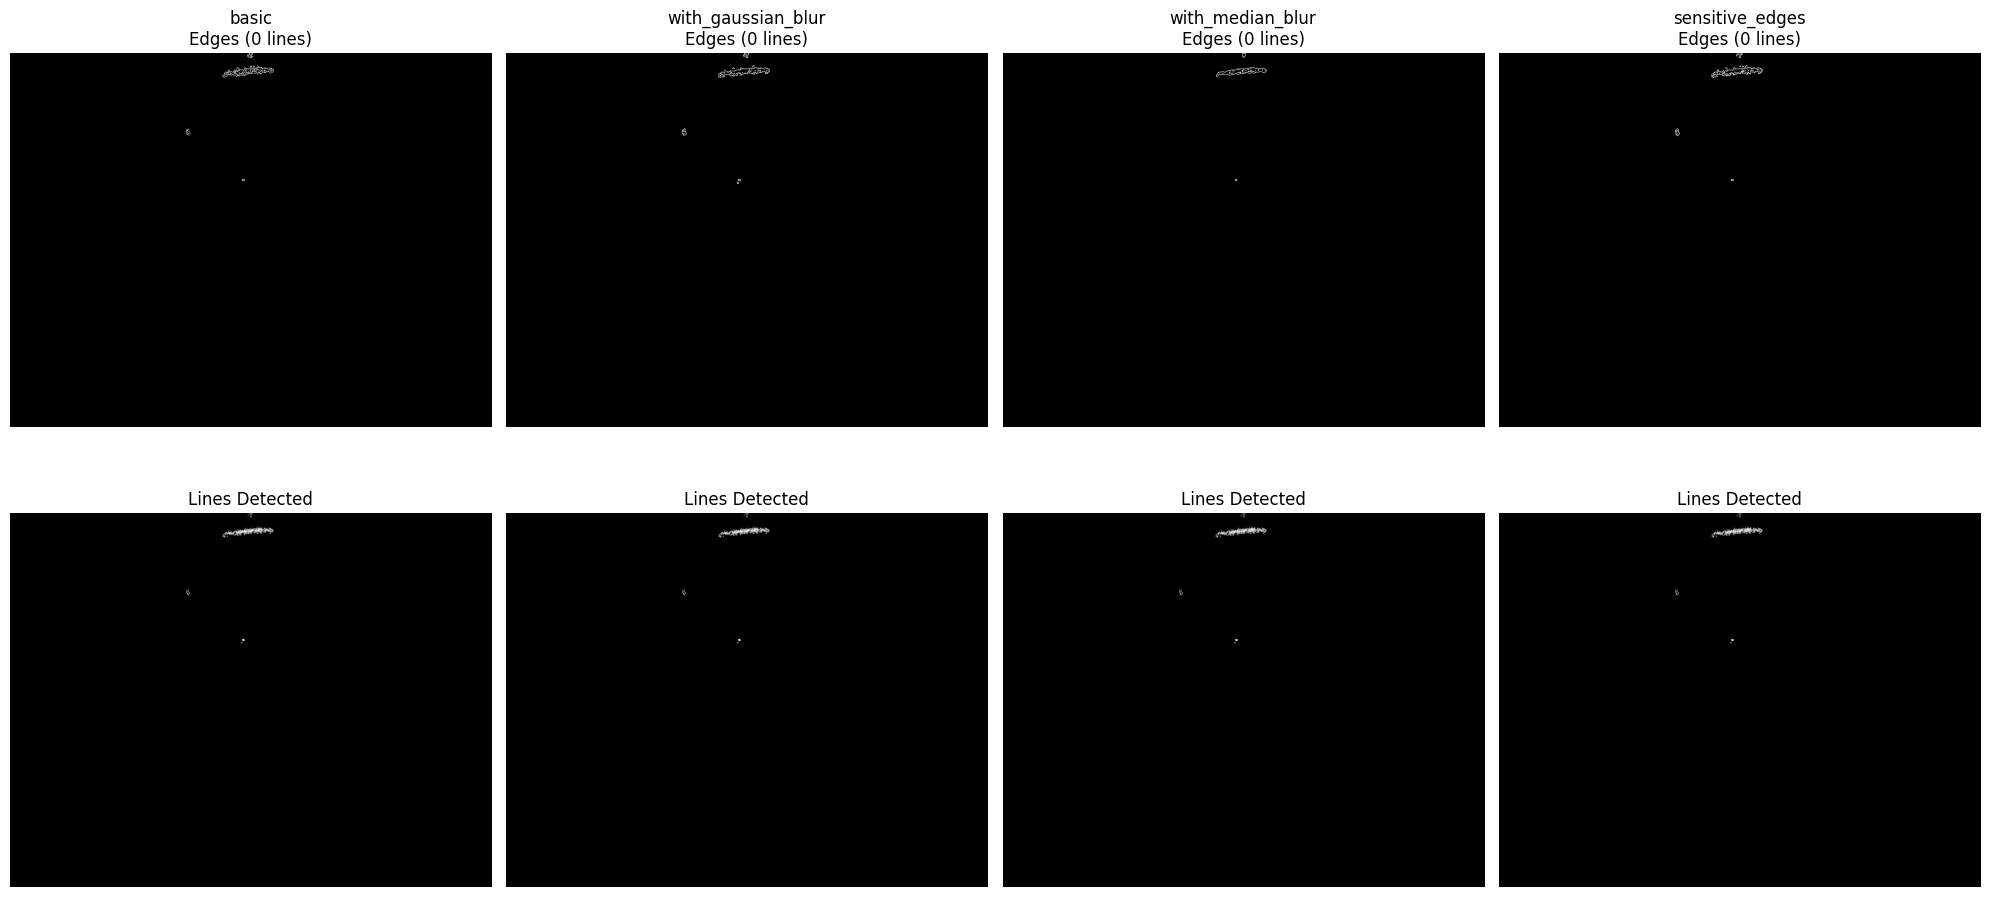


SUMMARY OF ALL METHODS:
basic                |   0 lines | original -> grayscale -> canny(50,150) -> find_lines_probabilistic(100)
with_gaussian_blur   |   0 lines | original -> grayscale -> blur_gaussian(5,1.0) -> canny(50,150) -> find_lines_probabilistic(80)
with_median_blur     |   0 lines | original -> grayscale -> blur_median(5,1.0) -> canny(40,120) -> find_lines_probabilistic(70)
sensitive_edges      |   0 lines | original -> grayscale -> blur_gaussian(3,0.8) -> canny(30,100) -> find_lines_probabilistic(60)


In [8]:
# Method 3: Configuration-driven pipeline
print("=== Method 3: Configuration-Driven Pipeline ===")

# Define different processing configurations
configs = {
    'basic': [
        {'operation': 'grayscale'},
        {'operation': 'canny', 'low_threshold': 50, 'high_threshold': 150},
        {'operation': 'find_lines', 'threshold': 100, 'min_line_length': 50, 'max_line_gap': 10}
    ],
    
    'with_gaussian_blur': [
        {'operation': 'grayscale'},
        {'operation': 'blur', 'blur_type': 'gaussian', 'ksize': 5, 'sigma': 1.0},
        {'operation': 'canny', 'low_threshold': 50, 'high_threshold': 150},
        {'operation': 'find_lines', 'threshold': 80, 'min_line_length': 40, 'max_line_gap': 15}
    ],
    
    'with_median_blur': [
        {'operation': 'grayscale'},
        {'operation': 'blur', 'blur_type': 'median', 'ksize': 5},
        {'operation': 'canny', 'low_threshold': 40, 'high_threshold': 120},
        {'operation': 'find_lines', 'threshold': 70, 'min_line_length': 30, 'max_line_gap': 20}
    ],
    
    'sensitive_edges': [
        {'operation': 'grayscale'},
        {'operation': 'blur', 'blur_type': 'gaussian', 'ksize': 3, 'sigma': 0.8},
        {'operation': 'canny', 'low_threshold': 30, 'high_threshold': 100},
        {'operation': 'find_lines', 'threshold': 60, 'min_line_length': 25, 'max_line_gap': 25}
    ]
}

# Process with each configuration
results = {}
for name, config in configs.items():
    print(f"\nProcessing with '{name}' configuration...")
    processed_image, lines, history = iau.process_image_pipeline(sample_image, config)
    results[name] = {
        'image': processed_image,
        'lines': lines,
        'history': history,
        'line_count': len(lines)
    }
    print(f"  History: {history}")
    print(f"  Lines found: {len(lines)}")

# Visualize all results
fig, axes = plt.subplots(2, len(configs), figsize=(20, 10))
if len(configs) == 1:
    axes = axes.reshape(2, 1)

for i, (name, result) in enumerate(results.items()):
    # Show processed edges
    axes[0, i].imshow(result['image'], cmap='gray')
    axes[0, i].set_title(f"{name}\nEdges ({result['line_count']} lines)")
    axes[0, i].axis('off')
    
    # Show lines on original
    lines_img = iau.draw_lines_on_image(sample_image, result['lines'], 
                                       color=(0, 255, 0), thickness=2)
    axes[1, i].imshow(lines_img)
    axes[1, i].set_title(f"Lines Detected")
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# Summary table
print("\n" + "="*80)
print("SUMMARY OF ALL METHODS:")
print("="*80)
for name, result in results.items():
    print(f"{name:20} | {result['line_count']:3d} lines | {result['history']}")
print("="*80)

## Step 2: Load and Display the Frame

Load the saved frame and display it:

=== Parameter Experimentation ===


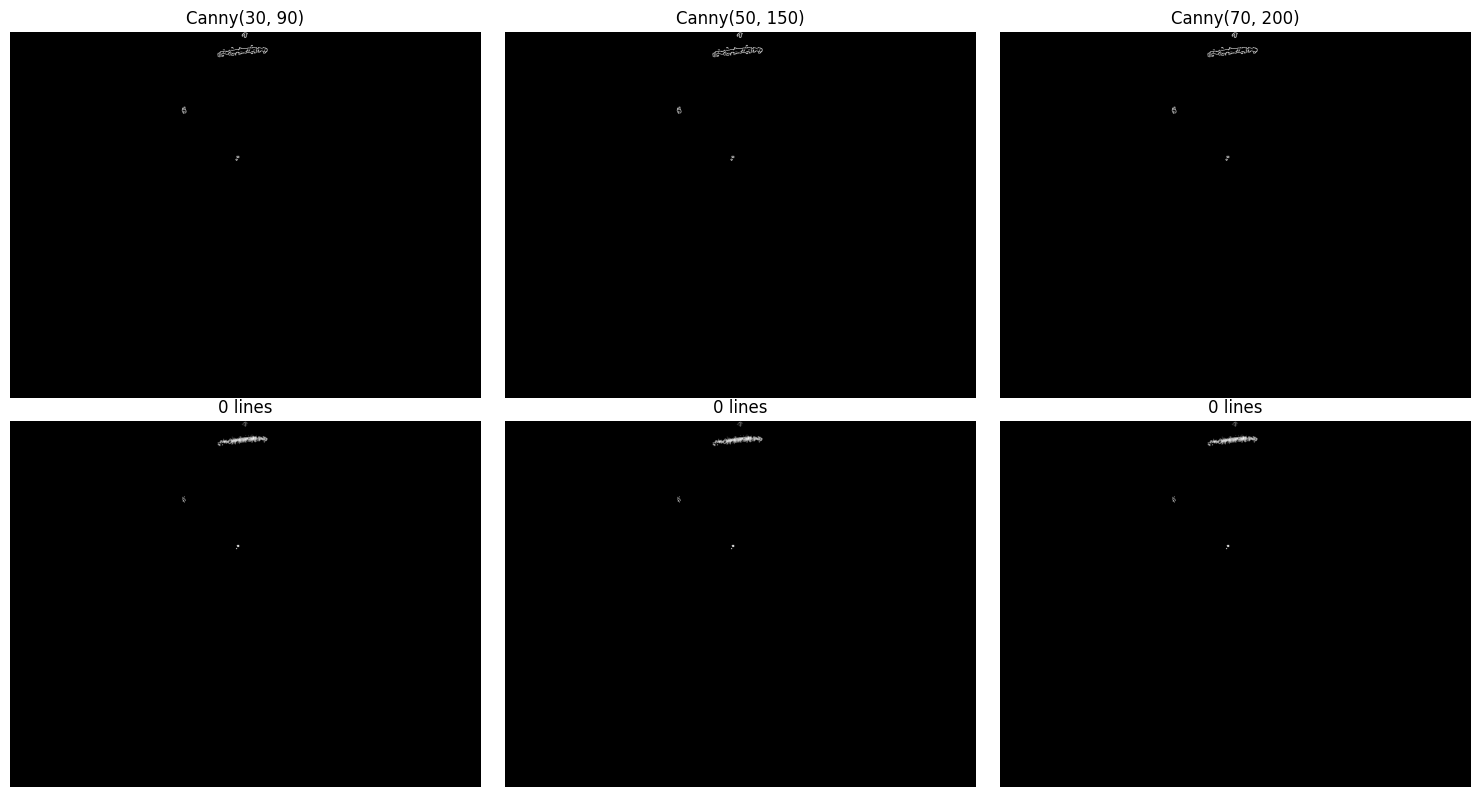

Easy to experiment with different sequences and parameters!


In [ ]:
# Load the saved frame (standard cv2)
img = cv2.imread('current_frame.png', cv2.IMREAD_GRAYSCALE)  # Load as grayscale
img_color = cv2.imread('current_frame.png')  # Load as color (BGR)

# Display
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title('Grayscale Frame')
axes[0].axis('off')

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
axes[1].imshow(img_rgb)
axes[1].set_title('Color Frame')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print(f"Image shape: {img.shape}")
print(f"Image type: {img.dtype}")
print(f"Value range: [{img.min()}, {img.max()}]")

## Quick Reference

Here's a summary of all available functions and their usage:

### Individual Functions:
- `iau.to_grayscale(image)` - Convert to grayscale
- `iau.blur_image(image, blur_type, ksize, sigma)` - Apply blur (gaussian/median/bilateral)
- `iau.canny_edge_detection(image, low_thresh, high_thresh)` - Canny edges
- `iau.blur_then_canny(image, ...)` - Combined blur + canny
- `iau.find_lines_hough(edges, ...)` - Find lines in edge image
- `iau.draw_lines_on_image(image, lines, ...)` - Draw detected lines

### Pipeline Class:
```python
processor = iau.ImageProcessor(image)
result = (processor
         .grayscale()
         .blur(blur_type='gaussian', ksize=5)
         .canny(low_threshold=50, high_threshold=150)
         .find_lines(threshold=100))
lines_image = processor.draw_lines(on_original=True)
```

### Configuration Pipeline:
```python
config = [
    {'operation': 'grayscale'},
    {'operation': 'blur', 'blur_type': 'gaussian', 'ksize': 5},
    {'operation': 'canny', 'low_threshold': 50, 'high_threshold': 150},
    {'operation': 'find_lines', 'threshold': 100}
]
processed, lines, history = iau.process_image_pipeline(image, config)
```